In [149]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

In [208]:
from requests import Request
from owslib.wfs import WebFeatureService
url = "https://geodata.nationaalgeoregister.nl/asbestscholenkaart/wfs"
wfs = WebFeatureService(url=url)
layer = list(wfs.contents)[-1]
params = dict(service='WFS', request='GetFeature',typeName="asbestscholenkaart:asbestscholenkaart",StartIndex='0', outputFormat='json')
q = Request('GET', url, params=params).prepare().url
data = gpd.read_file(q)
# data = gpd.read_file('data/asbestscholenkaart.csv')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [191]:
linkdata = gpd.read_file('data/Woonplaatsen.csv')

In [192]:
#deze data linkt de dataset van gemeentegrenzen aan die van asbestscholenkaart
linkdata= linkdata[['Woonplaatsen','Gemeentenaam']]
linkdata['Woonplaatsenhoofd'] = linkdata['Woonplaatsen'].str.upper()

In [209]:
#data.nunique()

In [210]:
data = data[["soort_instelling","naam_vestiging","plaatsnaam","straatnaam","postcode","huisnummer","x_y_coordinaten"]]

In [211]:
#omzetten data voor plot
#data['x_y_coordinaten'] = data['x_y_coordinaten'].apply(wkt.loads)
#data = data.set_geometry('x_y_coordinaten')
#data = data.to_crs(epsg=3857)

In [212]:
plaats = "DEDEMSVAART"

In [213]:
plaatsdata = data.loc[data['plaatsnaam'] == plaats]

In [220]:
plaatsdata['x_y_coordinaten'] = plaatsdata['x_y_coordinaten'].apply(wkt.loads)
data = data.to_crs(epsg=3857)
#data = data.set_geometry('x_y_coordinaten')
plaatsdata



TypeError: Only str is accepted.

In [102]:
aantalscholen = plaatsdata['soort_instelling'].count() 
aantalsoortschool = plaatsdata['soort_instelling'].nunique()
countdata = plaatsdata.groupby('soort_instelling').count()
countdata = countdata[['naam_vestiging']]
countdata = countdata.reset_index()


In [103]:
plaatsdata['soort_instelling'].unique()


array(['BO', 'VO'], dtype=object)

In [104]:

countdata

,soort_instelling,naam_vestiging
0,BO,6
1,VO,2


In [115]:
print('In', plaats,'zijn',aantalscholen, 'scholen gevestigd')
print('er zijn ', aantalsoortschool,'soorten scholen in ', plaats)

for index, row in countdata.iterrows():
    print('Aantal',row['soort_instelling'],'instellingen:',row['naam_vestiging'])

In DEDEMSVAART zijn 8 scholen gevestigd
er zijn  2 soorten scholen in  DEDEMSVAART
Aantal BO instellingen: 6
Aantal VO instellingen: 2


In [113]:
# ST_TONER = 'http://tile.stamen.com/toner/tileZ/tileX/tileY.png'
# ST_TONER_HYBRID = 'http://tile.stamen.com/toner-hybrid/tileZ/tileX/tileY.png'
# ST_TONER_LABELS = 'http://tile.stamen.com/toner-labels/tileZ/tileX/tileY.png'
# ST_TONER_LINES = 'http://tile.stamen.com/toner-lines/tileZ/tileX/tileY.png'
# ST_TONER_BACKGROUND = 'http://tile.stamen.com/toner-background/tileZ/tileX/tileY.png'
# ST_TONER_LITE = 'http://tile.stamen.com/toner-lite/tileZ/tileX/tileY.png'
# # 
# ST_TERRAIN = 'http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'
# ST_TERRAIN_LABELS = 'http://tile.stamen.com/terrain-labels/tileZ/tileX/tileY.png'
# ST_TERRAIN_LINES = 'http://tile.stamen.com/terrain-lines/tileZ/tileX/tileY.png'
# ST_TERRAIN_BACKGROUND = 'http://tile.stamen.com/terrain-background/tileZ/tileX/tileY.png'

# ST_WATERCOLOR = 'http://tile.stamen.com/watercolor/tileZ/tileX/tileY.png'
# OSM_A = 'http://a.tile.openstreetmap.org/tileZ/tileX/tileY.png'
# OSM_B = 'http://b.tile.openstreetmap.org/tileZ/tileX/tileY.png'
# OSM_C = 'http://c.tile.openstreetmap.org/tileZ/tileX/tileY.png'

In [143]:
# import matplotlib.pyplot as plt
# from matplotlib import cm
# import contextily as ctx
# cmap = plt.cm.get_cmap('Dark2', 9)
# ax = plaatsdata.plot(c=plaatsdata.naam_vestiging 	, cmap=cmap, label=plaatsdata.naam_vestiging, figsize=(10,10), alpha=.5)
# ctx.add_basemap(ax, source=ctx.sources.ST_TERRAIN)
# ax.set_axis_off()
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [131]:
#inladen gemeentegrensen uit pdok voor context plot
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService
def wfs_kadaster(url,type_param):
 wfs = WebFeatureService(url=url)
 layer = list(wfs.contents)[-1]
 params = dict(service='WFS', request='GetFeature',typeName=type_param ,StartIndex='0', outputFormat='json')
 q = Request('GET', url, params=params).prepare().url
 return gpd.read_file(q)


In [132]:
#uitvoeren wfs query op kadaster
gdata = wfs_kadaster("https://geodata.nationaalgeoregister.nl/bestuurlijkegrenzen/wfs","bestuurlijkegrenzen:gemeenten")


In [140]:
#gdata

In [135]:
#selecteren grensen van een gemeente
gemeente = "Hardenberg"
gemeentedata = gdata.loc[gdata['gemeentenaam'] == gemeente]

TypeError: no numeric data to plot

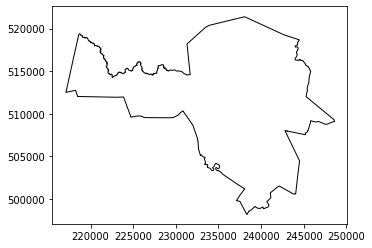

In [218]:
#plot de 2 lagen over elkaar
base = gemeentedata.plot(color="white",edgecolor='black')
plaatsdata.plot(ax=base, marker='o', color='black', markersize=5);